In [9]:
# Load necessary libraries
from scipy import io
import matplotlib.pyplot as plt
import numpy as np
import random
from keras.models import Sequential
from keras.layers import Dense, Activation

# ----------- w/o neighboring pixels ---------------

# Train and test data created by selecting 100 points from parameter images 
# in each intensity bin randomly, across 5 bins. This results in 500 points. Indices are then stored 
# and points are selected across DSA frames to create approx. 500 x 20 matrix. ROI data then 
# appended to create 500 x 40 matrix. 
def data_processing(inMatFile, feature):    
    data = io.loadmat(inMatFile)
    numPoint = 100
    
    roi_data = []
    roi = data['roi']
    for i in range(1024):
        for j in range(1024):
            intensity = roi[i][j]
            if (intensity > 0):
                roi_data.append([i,j])                
                
    # Getting feature image
    label_img = data[feature]
    size = len(label_img)
    
    # Normalize feature image
    lo = np.min(label_img)
    hi = np.max(label_img)
    label_img = (label_img - lo) / (hi - lo)    
    
    label_data = []

    totalCount = 0
    count1 = count2 = count3 = count4 = count5 = 0
    k = 0
    while (True):
        k = k + 1
        x = random.randint(0, size-1)
        y = random.randint(0, size-1)  

        intensity = label_img[x, y]

        if (intensity <= 0.2 and count1 <= numPoint):
            count1 = count1 + 1
            totalCount = totalCount + 1  
            label_data.append([intensity, x, y])

        elif (intensity > 0.2 and intensity <= 0.4 and count2 <= numPoint):
            count2 = count2 + 1
            totalCount = totalCount + 1
            label_data.append([intensity, x, y])

        elif (intensity > 0.4 and intensity <= 0.6 and count3 <= numPoint):
            count3 = count3 + 1
            totalCount = totalCount + 1
            label_data.append([intensity, x, y])

        elif (intensity > 0.6 and intensity <= 0.8 and count4 <= numPoint):
            count4 = count4 + 1
            totalCount = totalCount + 1
            label_data.append([intensity, x, y])

        elif (intensity > 0.8 and intensity <= 1.0 and count5 <= numPoint):
            count5 = count5 + 1
            totalCount = totalCount + 1
            label_data.append([intensity, x, y])

        if (count1 == numPoint and count2 == numPoint and count3 == numPoint and
           count4 == numPoint and count5 == numPoint):
            break

        if (totalCount >= 1000):
            break
            
        if (k >= size * size):
            break   
    
    # Getting training image
    training_img = data['X']

    # Slicing training image
    slice_2d = []
    for i in range(20):
        slice_2d.append(training_img[:,:,i])

    # Normalize training image
    normalized_training = []
    for index in range(20):
        img_i = slice_2d[index]
        
        lower = np.min(img_i)
        upper = np.max(img_i)        
       
        normalized = (img_i - lower) / (upper - lower)
        normalized_training.append(normalized)
        
    total_roi = []    
    for item in roi_data:
        x = item[0]
        y = item[1]

        point = []
        for i in range(20):
            img_i = normalized_training[i]
            point.append(img_i[x][y])

        total_roi.append(point)
    total_roi = np.array(total_roi, dtype='float64')

    roi_concat = []
    for i in range(20):
        col_roi = total_roi[:,i]
        m = np.mean(col_roi)
        roi_concat.append(m)
    roi_concat = np.array(roi_concat, dtype='float64')

        
    training_data = []

    for item in label_data: 
        intensity = item[0]
        x = item[1]
        y = item[2]
        temp = []
        for index in range(20):       
            img_i = normalized_training[index]
            pixel_value = img_i[x,y]
            temp.append(pixel_value)
            temp.append(roi_concat[i])
            

        training_data.append(temp)

    print(np.shape(training_data))

    x_train = []
    y_train = []

    for t in training_data:
        x_train.append(t)
        
    for la in label_data:
        intensity = la[0]
        y_train.append(intensity)
    
    
    print("X train", np.array(x_train).shape)
    print("Y train", np.array(y_train).shape)
    return x_train, y_train

    
print("Done")

Done


In [ ]:
# ---------------------- w/ neighboring pixels ---------------

# incorporates square region of size num_neighbors x num_neighbors into predictions 

# creates square of pixel intensities of size num_neighbors x num_neighbors, centered around a pixel
def neighbors(num_neighbors, x_val, y_val, image):
    square_shape = num_neighbors * num_neighbors 
    intensities = np.zeros((square_shape))
    for pix in range(square_shape):
        intensities[0] = image[x_val-num_neighbors, y_val-num_neighbors]
        
        
        
def neighbor_pixels(inMatFile, feature, num_neighbors):
    data = io.loadmat(inMatFile)
    numPoint = 100
    
    roi_data = []
    roi = data['roi']
    for i in range(1024):
        for j in range(1024):
            intensity = roi[i][j]
            if (intensity > 0):
                roi_data.append([i,j])                
                
    # Getting feature image
    label_img = data[feature]
    size = len(label_img)
    
    # Normalize feature image
    lo = np.min(label_img)
    hi = np.max(label_img)
    label_img = (label_img - lo) / (hi - lo)    
    
    label_data = []

    totalCount = 0
    count1 = count2 = count3 = count4 = count5 = 0
    k = 0
    while (True):
        k = k + 1
        x = random.randint(0, size-1)
        y = random.randint(0, size-1)  

        intensity = label_img[x, y]

        if (intensity <= 0.2 and count1 <= numPoint):
            count1 = count1 + 1
            totalCount = totalCount + 1  
            label_data.append([intensity, x, y])

        elif (intensity > 0.2 and intensity <= 0.4 and count2 <= numPoint):
            count2 = count2 + 1
            totalCount = totalCount + 1
            label_data.append([intensity, x, y])

        elif (intensity > 0.4 and intensity <= 0.6 and count3 <= numPoint):
            count3 = count3 + 1
            totalCount = totalCount + 1
            label_data.append([intensity, x, y])

        elif (intensity > 0.6 and intensity <= 0.8 and count4 <= numPoint):
            count4 = count4 + 1
            totalCount = totalCount + 1
            label_data.append([intensity, x, y])

        elif (intensity > 0.8 and intensity <= 1.0 and count5 <= numPoint):
            count5 = count5 + 1
            totalCount = totalCount + 1
            label_data.append([intensity, x, y])

        if (count1 == numPoint and count2 == numPoint and count3 == numPoint and
           count4 == numPoint and count5 == numPoint):
            break

        if (totalCount >= 1000):
            break
            
        if (k >= size * size):
            break   
    
    # Getting training image
    training_img = data['X']

    # Slicing training image
    slice_2d = []
    for i in range(20):
        slice_2d.append(training_img[:,:,i])

    # Normalize training image
    normalized_training = []
    for index in range(20):
        img_i = slice_2d[index]
        
        lower = np.min(img_i)
        upper = np.max(img_i)        
       
        normalized = (img_i - lower) / (upper - lower)
        normalized_training.append(normalized)
        
    total_roi = []    
    for item in roi_data:
        x = item[0]
        y = item[1]

        point = []
        for i in range(20):
            img_i = normalized_training[i]
            point.append(img_i[x][y])

        total_roi.append(point)
    total_roi = np.array(total_roi, dtype='float64')

    roi_concat = []
    for i in range(20):
        col_roi = total_roi[:,i]
        m = np.mean(col_roi)
        roi_concat.append(m)
    roi_concat = np.array(roi_concat, dtype='float64')

    training_data = []

    for item in label_data: 
        intensity = item[0]
        x = item[1]
        y = item[2]
        temp = []
        for index in range(20):       
            img_i = normalized_training[index]
            pixel_value = img_i[x,y]
            temp.append(pixel_value)
            temp.append(roi_concat[i])
            

        training_data.append(temp)

    print(np.shape(training_data))

    x_train = []
    y_train = []

    for t in training_data:
        x_train.append(t)
        
    for la in label_data:
        intensity = la[0]
        y_train.append(intensity)
    
    
    print("X train", np.array(x_train).shape)
    print("Y train", np.array(y_train).shape)
    return x_train, y_train

    
print("Done")
       
    
    

In [14]:
# predicting on 1024 x 1024 points (to create an image)
def test_extract(inMatFile):
    data = io.loadmat(inMatFile)    
    img = data['X']
    
    slice_2d = []
    normalized_img = []
    for i in range(20):
        slice_i = img[:,:,i]
        
        lo = np.min(slice_i)
        hi = np.max(slice_i)
        
        slice_i = (slice_i - lo) / (hi - lo)
        normalized_img.append(slice_i)
        
        temp = np.ndarray.flatten(slice_i)           
        slice_2d.append(temp)       
    
    slice_2d = np.array(slice_2d)
    
    t_return = []
    m_size = 1024 * 1024
    for i in range(m_size):
        c = []
        c = slice_2d[:,i]
        t_return.append(c)   
        
    t_return = np.asarray(t_return)
    
    roi_data = []
    roi = data['roi']
    for i in range(1024):
        for j in range(1024):
            intensity = roi[i][j]
            if (intensity > 0):
                roi_data.append([i,j])      
                
    total_roi = []    
    for item in roi_data:
        x = item[0]
        y = item[1]
        point = []
        for i in range(20):
            img_i = normalized_img[i]
            point.append(img_i[x][y])

        total_roi.append(point)
    total_roi = np.array(total_roi, dtype='float64')

    roi_concat = []
    for i in range(20):
        col_roi = total_roi[:,i]
        m = np.mean(col_roi)
        roi_concat.append(m)
    roi_concat = np.array(roi_concat, dtype='float64')
    
    print("Roi shape", roi_concat.shape)
    print("t return shape", t_return.shape)
    roi_t = np.zeros((t_return.shape[0], 40))
    for j in range(t_return.shape[0]):
        roi_t[j, :] = np.hstack((t_return[j, :], roi_concat))
   
    return roi_t


def label_extract(inMatFile, feature):
    data = io.loadmat(inMatFile)    
    img = data[feature]
    
    r_img = np.ndarray.flatten(img)
    
   
    #np.vstack((r_img, roi_points))
    
    return r_img

single_img_Xtest = test_extract("perfAngio_105.mat")

Roi shape (20,)
t return shape (1048576, 20)


In [2]:
# Data from desktop (CBV)
import os
from scipy import io

trainDir = "/Users/Ebrahim Feghhi/Desktop/Train_files/"
testDir =  "/Users/Ebrahim Feghhi/Desktop/Test_files/"

X_train = []
Y_train = []
for tr in os.listdir( trainDir ) :
    x_train_i, y_train_i = data_processing(trainDir + tr, 'CBV')
    
    for i in x_train_i:
        X_train.append(i)
        
    for j in y_train_i:
        Y_train.append(j)
    
        
X_test = []
Y_test = []
for te in os.listdir( testDir ):
    x_test_i, y_test_i = data_processing(testDir + te, 'CBV')
    
    for i in x_test_i:
        X_test.append(i)
        
    for j in y_test_i:
        Y_test.append(j)
    

(505, 40)
X train (505, 40)
Y train (505,)
(505, 40)
X train (505, 40)
Y train (505,)
(342, 40)
X train (342, 40)
Y train (342,)
(416, 40)
X train (416, 40)
Y train (416,)
(331, 40)
X train (331, 40)
Y train (331,)
(335, 40)
X train (335, 40)
Y train (335,)
(333, 40)
X train (333, 40)
Y train (333,)
(330, 40)
X train (330, 40)
Y train (330,)
(404, 40)
X train (404, 40)
Y train (404,)
(416, 40)
X train (416, 40)
Y train (416,)
(404, 40)
X train (404, 40)
Y train (404,)
(404, 40)
X train (404, 40)
Y train (404,)
(454, 40)
X train (454, 40)
Y train (454,)
(404, 40)
X train (404, 40)
Y train (404,)
(405, 40)
X train (405, 40)
Y train (405,)
(323, 40)
X train (323, 40)
Y train (323,)
(333, 40)
X train (333, 40)
Y train (333,)
(318, 40)
X train (318, 40)
Y train (318,)
(326, 40)
X train (326, 40)
Y train (326,)
(363, 40)
X train (363, 40)
Y train (363,)
(371, 40)
X train (371, 40)
Y train (371,)
(505, 40)
X train (505, 40)
Y train (505,)
(358, 40)
X train (358, 40)
Y train (358,)
(338, 40)
X

In [6]:
X_train_arr = np.asarray(X_train)
Y_train_arr = np.asarray(Y_train)

print("X train", X_train_arr.shape)
print("Y train", Y_train_arr.shape)

X_test_arr = np.asarray(X_test)
Y_test_arr = np.asarray(Y_test)

print("X test", X_test_arr.shape)
print("Y test", Y_test_arr.shape)

X train (38786, 40)
Y train (38786,)
X test (11806, 40)
Y test (11806,)


In [4]:
# file located in jupyter notebook
single_img_Xtest = test_extract("perfAngio_105.mat")
single_img_label = label_extract("perfAngio_105.mat", "CBV")

single_img_Xtest = np.array(single_img_Xtest)

print(single_img_Xtest.shape)
print(single_img_label.shape)

Roi shape (20,)
t return shape (1048576, 20)
(1048576, 40)
(1048576,)


In [10]:
import tensorflow as tf 

# neural network with one hidden layer of size 20 
cbv_model = Sequential()

# units gives the number of nodes in the next hidden layer
cbv_model.add(Dense(units=20, activation='relu', input_dim = 40))
cbv_model.add(Dense(units=1, activation='linear'))

cbv_model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

cbv_model.fit(X_train_arr, Y_train_arr, epochs=6, batch_size=500)

loss_and_metrics = cbv_model.evaluate(X_test_arr, Y_test_arr, batch_size=200)

Epoch 1/6
38786/38786 [==============================] - 0s 10us/step - loss: 0.9086 - mean_squared_error: 0.9086 - mean_absolute_error: 0.7268
Epoch 2/6
38786/38786 [==============================] - 0s 6us/step - loss: 0.0419 - mean_squared_error: 0.0419 - mean_absolute_error: 0.1586
Epoch 3/6
38786/38786 [==============================] - 0s 8us/step - loss: 0.0113 - mean_squared_error: 0.0113 - mean_absolute_error: 0.0761
Epoch 4/6
38786/38786 [==============================] - 0s 7us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0631
Epoch 5/6
38786/38786 [==============================] - 0s 6us/step - loss: 0.0065 - mean_squared_error: 0.0065 - mean_absolute_error: 0.0580
Epoch 6/6
11806/11806 [==============================] - 0s 13us/step


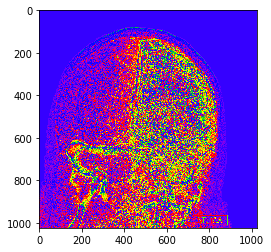

In [11]:
cbv_nn_pred = cbv_model.predict(single_img_Xtest)
cbv_nn_pred = np.reshape(cbv_nn_pred, (1024, 1024))

plt.imshow(cbv_nn_pred, cmap='prism')

In [21]:
# Linear regression 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets

#print(np.shape(X_train_arr))
#print(Y_train_arr[100, :])
regr.fit(X_train_arr, Y_train_arr)


# Make predictions using the testing set
Y_pred = regr.predict(X_test_arr)


# The mean squared error
print("Mean squared error: %.3f" % mean_squared_error(Y_test_arr, Y_pred))

# Explained variance score: 1 is perfect prediction
print("Variance score: %.3f" % r2_score(Y_test_arr, Y_pred))

X train (38807, 40)
Y train (38807,)
X test (11805, 40)
Y test (11805,)
Mean squared error: 0.005
Variance score: 0.960


In [24]:
from sklearn.kernel_ridge import KernelRidge

clf_kern = KernelRidge(alpha=1.0)

X_train_red = X_train_arr[0:15000, :]
Y_train_red = Y_train_arr[0:15000]

clf_kern.fit(X_train_red, Y_train_red)

X_test_red = X_test_arr[0:5000, :]

Y_pred_red = clf_kern.predict(X_test_red)


Y_test_red = Y_test_arr[0:5000]
print("Mean squared error: %.3f" % mean_squared_error(Y_test_red, Y_pred_red))
print("Variance score: %.3f" % r2_score(Y_test_red, Y_pred_red))

Mean squared error: 0.018
Variance score: 0.871


In [25]:
from sklearn.linear_model import Ridge


clf2 = Ridge(alpha=.1)

clf2.fit(X_train, Y_train)
Y_pred_red2 = clf2.predict(X_test)

print("Mean squared error: %.3f" % mean_squared_error(Y_test, Y_pred_red2))
print("Variance score: %.3f" % r2_score(Y_test, Y_pred_red2))


Mean squared error: 0.005
Variance score: 0.960


In [45]:
# predicting on all points in an image 
single_img_pred = clf2.predict(single_img_Xtest)

#single_img_pred = single_img_pred[:, 0]

print("Mean squared error: %.3f" % mean_squared_error(single_img_label, single_img_pred))
print("Variance score: %.3f" % r2_score(single_img_label, single_img_pred))

print(np.array(single_img_pred).shape)

Mean squared error: 11.770
Variance score: -0.153
(1048576,)


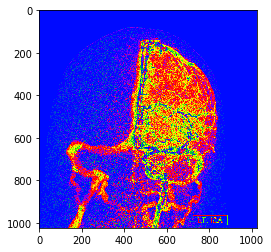

In [46]:
CBV_pred = np.reshape(single_img_pred, (1024, 1024))
plt.imshow(CBV_pred, cmap='prism')

Mean squared error: 11.625
Variance score: -0.139


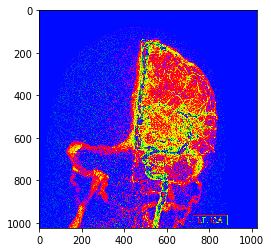

In [55]:
regr2 = linear_model.Lasso(alpha=.01)

regr2.fit(X_train, Y_train)
single_img_pred = regr2.predict(single_img_Xtest)

#single_img_pred2 = single_img_pred2[:, 0]

print("Mean squared error: %.3f" % mean_squared_error(single_img_label, single_img_pred))
print("Variance score: %.3f" % r2_score(single_img_label, single_img_pred))

CBV_pred2 = np.reshape(single_img_pred, (1024, 1024))
plt.imshow(CBV_pred2, cmap='prism')

(1048576, 40)
(1048576,)


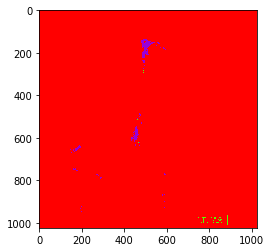

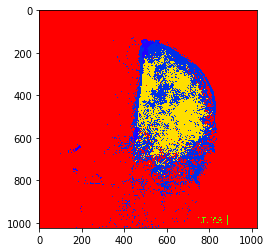

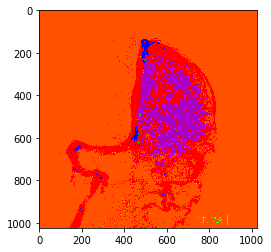

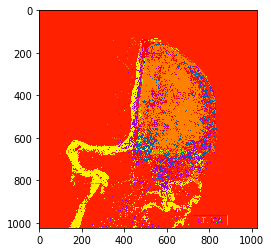

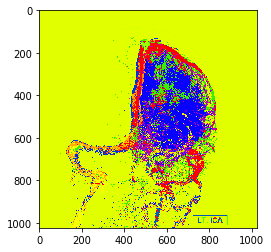

In [67]:
from sklearn.tree import DecisionTreeRegressor

regr_1 = DecisionTreeRegressor(max_depth=3)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=8)
regr_4 = DecisionTreeRegressor(max_depth=10)
regr_5 = DecisionTreeRegressor(max_depth=14)

regr_1.fit(X_train, Y_train)
regr_2.fit(X_train, Y_train)
regr_3.fit(X_train, Y_train)
#print(Y_train.shape)
regr_4.fit(X_train, Y_train)
regr_5.fit(X_train, Y_train)


#single_img_pred = clf2.predict(single_img_Xtest)
single_img_pred1 = regr_1.predict(single_img_Xtest)
single_img_pred2 = regr_2.predict(single_img_Xtest)
single_img_pred3 = regr_3.predict(single_img_Xtest)
single_img_pred4 = regr_4.predict(single_img_Xtest)
single_img_pred5 = regr_5.predict(single_img_Xtest)

print(single_img_Xtest.shape)
print(single_img_pred.shape)

plt.figure()
CBV_pred2 = np.reshape(single_img_pred1, (1024, 1024))
plt.imshow(CBV_pred2, cmap='prism')
plt.figure()
CBV_pred2 = np.reshape(single_img_pred2, (1024, 1024))
plt.imshow(CBV_pred2, cmap='prism')
plt.figure()
CBV_pred2 = np.reshape(single_img_pred3, (1024, 1024))
plt.imshow(CBV_pred2, cmap='prism')
plt.figure()
CBV_pred2 = np.reshape(single_img_pred4, (1024, 1024))
plt.imshow(CBV_pred2, cmap='prism')
plt.figure()
CBV_pred2 = np.reshape(single_img_pred5, (1024, 1024))
plt.imshow(CBV_pred2, cmap='prism')

In [52]:
from sklearn import svm
clf_svm = svm.SVR(gamma='auto')
Y_train_1d = Y_train_arr
clf_svm.fit(X_train_arr, Y_train_1d)
#print(X_train_arr.shape)
#print(single_img_Xtest.shape)
single_img_svm = clf_svm.predict(single_img_Xtest)

(1048576,)


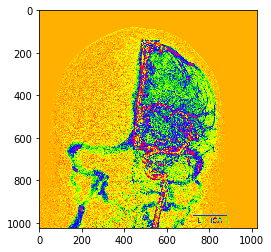

In [54]:
print(single_img_svm.shape)
CBV_pred2 = np.reshape(single_img_svm, (1024, 1024))
plt.imshow(CBV_pred2, cmap='prism')

In [12]:
# Data from desktop (MTT)
import os
from scipy import io

trainDir = "/Users/Ebrahim Feghhi/Desktop/Train_files/"
testDir =  "/Users/Ebrahim Feghhi/Desktop/Test_files/"

X_train_M = []
Y_train_M = []
for tr in os.listdir( trainDir ) :
    x_train_i, y_train_i = data_processing(trainDir + tr, 'MTT')
    
    for i in x_train_i:
        X_train_M.append(i)
        
    for j in y_train_i:
        Y_train_M.append(j)
    
        
X_test_M = []
Y_test_M = []
for te in os.listdir( testDir ):
    x_test_i, y_test_i = data_processing(testDir + te, 'MTT')
    
    for i in x_test_i:
        X_test_M.append(i)
        
    for j in y_test_i:
        Y_test_M.append(j)

(505, 40)
X train (505, 40)
Y train (505,)
(505, 40)
X train (505, 40)
Y train (505,)
(505, 40)
X train (505, 40)
Y train (505,)
(308, 40)
X train (308, 40)
Y train (308,)
(505, 40)
X train (505, 40)
Y train (505,)
(505, 40)
X train (505, 40)
Y train (505,)
(357, 40)
X train (357, 40)
Y train (357,)
(220, 40)
X train (220, 40)
Y train (220,)
(229, 40)
X train (229, 40)
Y train (229,)
(505, 40)
X train (505, 40)
Y train (505,)
(424, 40)
X train (424, 40)
Y train (424,)
(505, 40)
X train (505, 40)
Y train (505,)
(505, 40)
X train (505, 40)
Y train (505,)
(505, 40)
X train (505, 40)
Y train (505,)
(418, 40)
X train (418, 40)
Y train (418,)
(353, 40)
X train (353, 40)
Y train (353,)
(367, 40)
X train (367, 40)
Y train (367,)
(427, 40)
X train (427, 40)
Y train (427,)
(342, 40)
X train (342, 40)
Y train (342,)
(226, 40)
X train (226, 40)
Y train (226,)
(254, 40)
X train (254, 40)
Y train (254,)
(505, 40)
X train (505, 40)
Y train (505,)
(505, 40)
X train (505, 40)
Y train (505,)
(366, 40)
X

In [15]:
X_trainM_arr = np.asarray(X_train_M)
Y_trainM_arr = np.asarray(Y_train_M)

print("X train", X_trainM_arr.shape)
print("Y train", Y_trainM_arr.shape)

X_testM_arr = np.asarray(X_test_M)
Y_testM_arr = np.asarray(Y_test_M)

print("X test", X_testM_arr.shape)
print("Y test", Y_testM_arr.shape)

X train (39297, 40)
Y train (39297,)
X test (13443, 40)
Y test (13443,)


In [13]:
single_img_labelM = label_extract("perfAngio_105.mat", "MTT")

In [16]:
mtt_model = Sequential()

from keras.models import Sequential
from keras.layers import Dense, Activation
# units gives the number of nodes in the next hidden layer
mtt_model.add(Dense(units=20, activation='relu', input_dim = 40))
mtt_model.add(Dense(units=1, activation='linear'))

mtt_model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

mtt_model.fit(X_trainM_arr, Y_trainM_arr, epochs=8, batch_size=500)

loss_and_metrics = mtt_model.evaluate(X_testM_arr, Y_testM_arr, batch_size=200)


Epoch 1/8
39297/39297 [==============================] - 1s 18us/step - loss: 0.1068 - mean_squared_error: 0.1068 - mean_absolute_error: 0.2818
Epoch 2/8
39297/39297 [==============================] - 0s 9us/step - loss: 0.1017 - mean_squared_error: 0.1017 - mean_absolute_error: 0.2748
Epoch 3/8
39297/39297 [==============================] - 0s 7us/step - loss: 0.0993 - mean_squared_error: 0.0993 - mean_absolute_error: 0.2712
Epoch 4/8
39297/39297 [==============================] - 0s 6us/step - loss: 0.0984 - mean_squared_error: 0.0984 - mean_absolute_error: 0.2694
Epoch 5/8
39297/39297 [==============================] - 0s 5us/step - loss: 0.0973 - mean_squared_error: 0.0973 - mean_absolute_error: 0.2676
Epoch 6/8
39297/39297 [==============================] - 0s 6us/step - loss: 0.0963 - mean_squared_error: 0.0963 - mean_absolute_error: 0.2660
Epoch 7/8
39297/39297 [==============================] - 0s 6us/step - loss: 0.0956 - mean_squared_error: 0.0956 - mean_absolute_error: 0.264

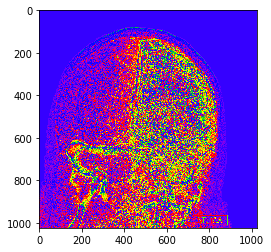

In [17]:
mtt_nn_pred = cbv_model.predict(single_img_Xtest)
mtt_nn_pred = np.reshape(mtt_nn_pred, (1024, 1024))

plt.imshow(mtt_nn_pred, cmap='prism')

In [20]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr_MTT = linear_model.LinearRegression()

# Train the model using the training sets



#print(np.shape(X_train_arr))
#print(Y_train_arr[100, :])

regr_MTT.fit(X_trainM_arr, Y_trainM_arr)

# Make predictions using the testing set
Y_predM = regr_MTT.predict(X_testM_arr)


# The mean squared error
print("Mean squared error: %.3f" % mean_squared_error(Y_testM_arr, Y_predM))

# Explained variance score: 1 is perfect prediction
print("Variance score: %.3f" % r2_score(Y_testM_arr, Y_predM))

X train (39174, 40)
Y train (39174,)
X test (13435, 40)
Y test (13435,)
Mean squared error: 0.090
Variance score: 0.198


In [25]:
from sklearn.linear_model import Ridge

clf_MTT_ridge = Ridge(alpha=100)

clf_MTT_ridge.fit(X_train_M, Y_train_M)
Y_pred_M= clf_MTT_ridge.predict(X_test_M)

print("Mean squared error: %.3f" % mean_squared_error(Y_test_M, Y_pred_M))
print("Variance score: %.3f" % r2_score(Y_test_M, Y_pred_M))

Mean squared error: 0.091
Variance score: 0.193


In [27]:
# predicting on all points in an image 
single_img_ridgeM = clf_MTT_ridge.predict(single_img_Xtest)


print("Mean squared error: %.3f" % mean_squared_error(single_img_labelM, single_img_ridgeM))
print("Variance score: %.3f" % r2_score(single_img_labelM, single_img_ridgeM))

print(np.array(single_img_ridgeM).shape)

Mean squared error: 3373716779.192
Variance score: -0.000
(1048576,)


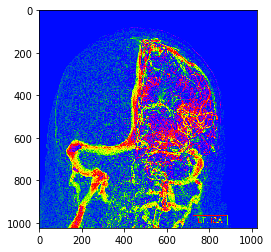

In [29]:
MTT_pred = np.reshape(single_img_ridgeM, (1024, 1024))
plt.imshow(MTT_pred, cmap='prism')

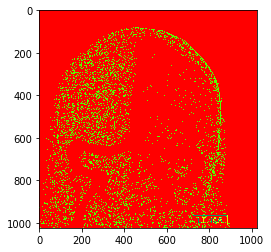

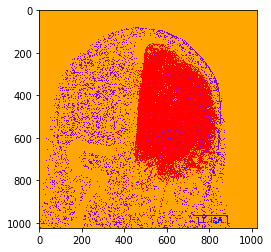

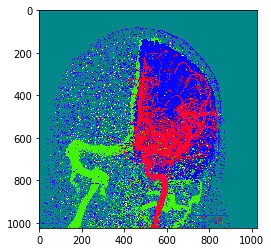

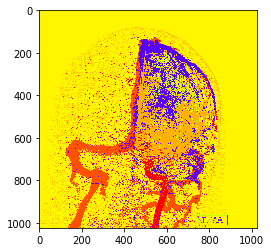

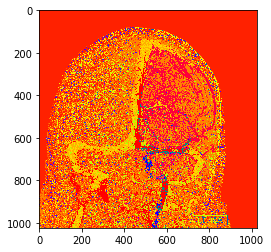

In [31]:
from sklearn.tree import DecisionTreeRegressor

dt_MTT_1 = DecisionTreeRegressor(max_depth=3)
dt_MTT_2 = DecisionTreeRegressor(max_depth=5)
dt_MTT_3 = DecisionTreeRegressor(max_depth=8)
dt_MTT_4 = DecisionTreeRegressor(max_depth=10)
dt_MTT_5 = DecisionTreeRegressor(max_depth=14)

dt_MTT_1.fit(X_train_M, Y_train_M)
dt_MTT_2.fit(X_train_M, Y_train_M)
dt_MTT_3.fit(X_train_M, Y_train_M)
#print(Y_train.shape)
dt_MTT_4.fit(X_train_M, Y_train_M)
dt_MTT_5.fit(X_train_M, Y_train_M)


#single_img_pred = clf2.predict(single_img_Xtest)
single_img_dt_MTT1 = dt_MTT_1.predict(single_img_Xtest)
single_img_dt_MTT2 = dt_MTT_2.predict(single_img_Xtest)
single_img_dt_MTT3 = dt_MTT_3.predict(single_img_Xtest)
single_img_dt_MTT4 = dt_MTT_4.predict(single_img_Xtest)
single_img_dt_MTT5 = dt_MTT_5.predict(single_img_Xtest)

#print(single_img_Xtest.shape)
#print(single_img_pred.shape)

plt.figure()
plt.imshow(np.reshape(single_img_dt_MTT1, (1024, 1024)), cmap='prism')
plt.figure()
plt.imshow(np.reshape(single_img_dt_MTT2, (1024, 1024)), cmap='prism')
plt.figure()
plt.imshow(np.reshape(single_img_dt_MTT3, (1024, 1024)), cmap='prism')
plt.figure()
plt.imshow(np.reshape(single_img_dt_MTT4, (1024, 1024)), cmap='prism')
plt.figure()
plt.imshow(np.reshape(single_img_dt_MTT5, (1024, 1024)), cmap='prism')

In [ ]:
plt.imshow(np.reshape(single_img_MTT_svm, (1024,1024)))

(1048576,)


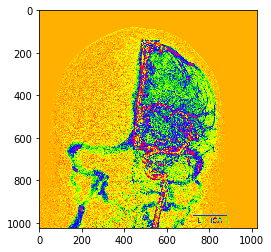

In [85]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            plt.imshow(np.reshape(single_img_svm, (1024, 1024)), cmap='prism')

In [18]:
# import from desktop (CBF)
import os
from scipy import io

trainDir = "/Users/Ebrahim Feghhi/Desktop/Train_files/"
testDir =  "/Users/Ebrahim Feghhi/Desktop/Test_files/"

X_train_C = []
Y_train_C = []
for tr in os.listdir( trainDir ) :
    x_train_i, y_train_i = data_processing(trainDir + tr, 'CBF')
    
    for i in x_train_i:
        X_train_C.append(i)
        
    for j in y_train_i:
        Y_train_C.append(j)
    
        
X_test_C = []
Y_test_C = []
for te in os.listdir( testDir ):
    x_test_i, y_test_i = data_processing(testDir + te, 'CBF')
    
    for i in x_test_i:
        X_test_C.append(i)
        
    for j in y_test_i:
        Y_test_C.append(j)

(505, 40)
X train (505, 40)
Y train (505,)
(505, 40)
X train (505, 40)
Y train (505,)
(406, 40)
X train (406, 40)
Y train (406,)
(436, 40)
X train (436, 40)
Y train (436,)
(404, 40)
X train (404, 40)
Y train (404,)
(404, 40)
X train (404, 40)
Y train (404,)
(410, 40)
X train (410, 40)
Y train (410,)
(505, 40)
X train (505, 40)
Y train (505,)
(505, 40)
X train (505, 40)
Y train (505,)
(505, 40)
X train (505, 40)
Y train (505,)
(505, 40)
X train (505, 40)
Y train (505,)
(450, 40)
X train (450, 40)
Y train (450,)
(505, 40)
X train (505, 40)
Y train (505,)
(505, 40)
X train (505, 40)
Y train (505,)
(505, 40)
X train (505, 40)
Y train (505,)
(370, 40)
X train (370, 40)
Y train (370,)
(404, 40)
X train (404, 40)
Y train (404,)
(404, 40)
X train (404, 40)
Y train (404,)
(409, 40)
X train (409, 40)
Y train (409,)
(404, 40)
X train (404, 40)
Y train (404,)
(404, 40)
X train (404, 40)
Y train (404,)
(505, 40)
X train (505, 40)
Y train (505,)
(404, 40)
X train (404, 40)
Y train (404,)
(404, 40)
X

In [19]:
X_trainC_arr = np.asarray(X_train_C)
Y_trainC_arr = np.asarray(Y_train_C)

print("X train", X_trainC_arr.shape)
print("Y train", Y_trainC_arr.shape)

X_testC_arr = np.asarray(X_test_C)
Y_testC_arr = np.asarray(Y_test_C)

print("X test", X_testC_arr.shape)
print("Y test", Y_testC_arr.shape)

X train (44550, 40)
Y train (44550,)
X test (13167, 40)
Y test (13167,)


In [20]:
single_img_labelC = label_extract("perfAngio_105.mat", "CBF")

In [21]:
cbf_model = Sequential()

# units gives the number of nodes in the next hidden layer
cbf_model.add(Dense(units=20, activation='relu', input_dim = 40))
cbf_model.add(Dense(units=1, activation='linear'))

cbf_model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

cbf_model.fit(X_trainC_arr, Y_trainC_arr, epochs=8, batch_size=500)

loss_and_metrics = mtt_model.evaluate(X_testC_arr, Y_testC_arr, batch_size=200)


Epoch 1/8
44550/44550 [==============================] - 1s 12us/step - loss: 0.1986 - mean_squared_error: 0.1986 - mean_absolute_error: 0.3032
Epoch 2/8
44550/44550 [==============================] - 0s 5us/step - loss: 0.0199 - mean_squared_error: 0.0199 - mean_absolute_error: 0.1081
Epoch 3/8
44550/44550 [==============================] - 0s 5us/step - loss: 0.0137 - mean_squared_error: 0.0137 - mean_absolute_error: 0.0894
Epoch 4/8
44550/44550 [==============================] - 0s 6us/step - loss: 0.0093 - mean_squared_error: 0.0093 - mean_absolute_error: 0.0734
Epoch 5/8
44550/44550 [==============================] - 0s 5us/step - loss: 0.0071 - mean_squared_error: 0.0071 - mean_absolute_error: 0.0643
Epoch 6/8
44550/44550 [==============================] - 0s 6us/step - loss: 0.0059 - mean_squared_error: 0.0059 - mean_absolute_error: 0.0588
Epoch 7/8
44550/44550 [==============================] - 0s 6us/step - loss: 0.0053 - mean_squared_error: 0.0053 - mean_absolute_error: 0.056

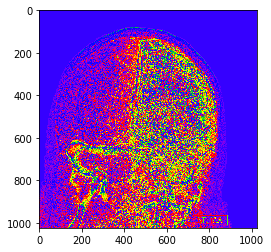

In [22]:
cbf_nn_pred = cbv_model.predict(single_img_Xtest)
cbf_nn_pred = np.reshape(cbf_nn_pred, (1024, 1024))

plt.imshow(cbf_nn_pred, cmap='prism')

In [7]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr_CBF = linear_model.LinearRegression()
regr_CBF.fit(X_trainC_arr, Y_trainC_arr)

# Make predictions using the testing set
Y_predC = regr_CBF.predict(X_testC_arr)


# The mean squared error
print("Mean squared error: %.3f" % mean_squared_error(Y_testC_arr, Y_predC))

# Explained variance score: 1 is perfect prediction
print("Variance score: %.3f" % r2_score(Y_testC_arr, Y_predC))

X train (44589, 40)
Y train (44589,)
X test (13196, 40)
Y test (13196,)
Mean squared error: 0.008
Variance score: 0.933


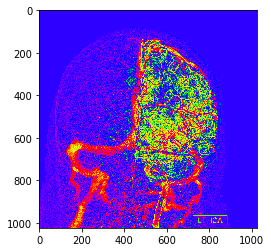

In [9]:
# predicting on whole image using linear regression 
single_img_predC = regr_CBF.predict(single_img_Xtest)
CBF_pred_reg = np.reshape(single_img_predC, (1024, 1024))
plt.imshow(CBF_pred_reg, cmap='prism')

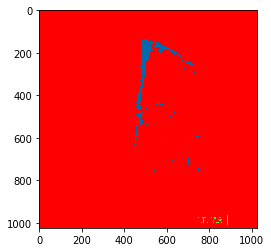

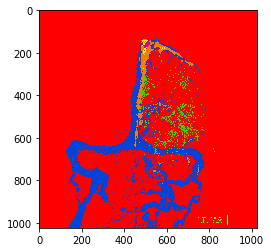

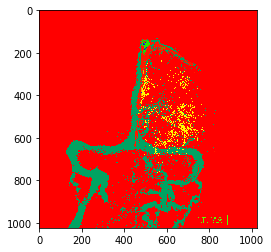

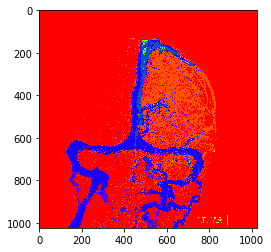

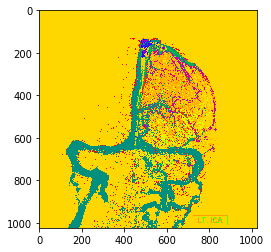

In [13]:
from sklearn.tree import DecisionTreeRegressor

dt_CBF_1 = DecisionTreeRegressor(max_depth=3)
dt_CBF_2 = DecisionTreeRegressor(max_depth=5)
dt_CBF_3 = DecisionTreeRegressor(max_depth=8)
dt_CBF_4 = DecisionTreeRegressor(max_depth=10)
dt_CBF_5 = DecisionTreeRegressor(max_depth=14)

dt_CBF_1.fit(X_train_C, Y_train_C)
dt_CBF_2.fit(X_train_C, Y_train_C)
dt_CBF_3.fit(X_train_C, Y_train_C)
#print(Y_train.shape)
dt_CBF_4.fit(X_train_C, Y_train_C)
dt_CBF_5.fit(X_train_C, Y_train_C)


#single_img_pred = clf2.predict(single_img_Xtest)
dt_img_CBF1 = dt_CBF_1.predict(single_img_Xtest)
dt_img_CBF2 = dt_CBF_2.predict(single_img_Xtest)
dt_img_CBF3 = dt_CBF_3.predict(single_img_Xtest)
dt_img_CBF4 = dt_CBF_4.predict(single_img_Xtest)
dt_img_CBF5 = dt_CBF_5.predict(single_img_Xtest)

#print(single_img_Xtest.shape)
#print(single_img_pred.shape)

plt.figure()
CBF_pred2 = np.reshape(dt_img_CBF1, (1024, 1024))
plt.imshow(CBV_pred2, cmap='prism')
plt.figure()
CBF_pred2 = np.reshape(dt_img_CBF2, (1024, 1024))
plt.imshow(CBV_pred2, cmap='prism')
plt.figure()
CBF_pred2 = np.reshape(dt_img_CBF3, (1024, 1024))
plt.imshow(CBV_pred2, cmap='prism')
plt.figure()
CBF_pred2 = np.reshape(dt_img_CBF4, (1024, 1024))
plt.imshow(CBV_pred2, cmap='prism')
plt.figure()
CBF_pred2 = np.reshape(dt_img_CBF5, (1024, 1024))
plt.imshow(CBV_pred2, cmap='prism')

In [14]:
from sklearn import svm
CBF_svm = svm.SVR(gamma='auto')
CBF_svm.fit(X_trainC_arr, Y_trainC_arr)
#print(X_train_arr.shape)
#print(single_img_Xtest.shape)
single_img_CBF_svm = CBF_svm.predict(single_img_Xtest)

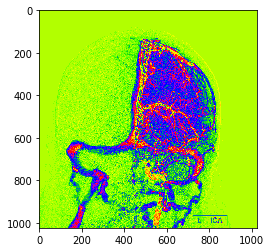

In [17]:
plt.imshow(np.reshape(single_img_CBF_svm, (1024,1024)), cmap='prism')

In [4]:
# import from Desktop (TTP)
import os
from scipy import io

trainDir = "/Users/Ebrahim Feghhi/Desktop/Train_files/"
testDir =  "/Users/Ebrahim Feghhi/Desktop/Test_files/"

X_train_T = []
Y_train_T = []
for tr in os.listdir( trainDir ) :
    x_train_i, y_train_i = data_processing(trainDir + tr, 'TTP')
    
    for i in x_train_i:
        X_train_T.append(i)
        
    for j in y_train_i:
        Y_train_T.append(j)
    
        
X_test_T = []
Y_test_T = []
for te in os.listdir( testDir ):
    x_test_i, y_test_i = data_processing(testDir + te, 'TTP')
    
    for i in x_test_i:
        X_test_T.append(i)
        
    for j in y_test_i:
        Y_test_T.append(j)

(505, 40)
X train (505, 40)
Y train (505,)
(505, 40)
X train (505, 40)
Y train (505,)
(505, 40)
X train (505, 40)
Y train (505,)
(505, 40)
X train (505, 40)
Y train (505,)
(505, 40)
X train (505, 40)
Y train (505,)
(505, 40)
X train (505, 40)
Y train (505,)
(505, 40)
X train (505, 40)
Y train (505,)
(505, 40)
X train (505, 40)
Y train (505,)
(505, 40)
X train (505, 40)
Y train (505,)
(505, 40)
X train (505, 40)
Y train (505,)
(505, 40)
X train (505, 40)
Y train (505,)
(505, 40)
X train (505, 40)
Y train (505,)
(505, 40)
X train (505, 40)
Y train (505,)
(505, 40)
X train (505, 40)
Y train (505,)
(505, 40)
X train (505, 40)
Y train (505,)
(505, 40)
X train (505, 40)
Y train (505,)
(505, 40)
X train (505, 40)
Y train (505,)
(505, 40)
X train (505, 40)
Y train (505,)
(505, 40)
X train (505, 40)
Y train (505,)
(505, 40)
X train (505, 40)
Y train (505,)
(505, 40)
X train (505, 40)
Y train (505,)
(505, 40)
X train (505, 40)
Y train (505,)
(505, 40)
X train (505, 40)
Y train (505,)
(505, 40)
X

In [5]:
X_trainT_arr = np.asarray(X_train_T)
Y_trainT_arr = np.asarray(Y_train_T)

print("X train", X_trainT_arr.shape)
print("Y train", Y_trainT_arr.shape)

X_testT_arr = np.asarray(X_test_T)
Y_testT_arr = np.asarray(Y_test_T)

print("X test", X_testT_arr.shape)
print("Y test", Y_testT_arr.shape)


X train (50500, 40)
Y train (50500,)
X test (15655, 40)
Y test (15655,)


In [11]:

TTP_model = Sequential()

# units gives the number of nodes in the next hidden layer
TTP_model.add(Dense(units=20, activation='relu', input_dim = 40))
TTP_model.add(Dense(units=1, activation='linear'))

TTP_model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

TTP_model.fit(X_trainT_arr, Y_trainT_arr, epochs=8, batch_size=500)

loss_and_metrics = TTP_model.evaluate(X_testT_arr, Y_testT_arr, batch_size=200)

W0623 22:14:51.978135  8492 deprecation_wrapper.py:119] From C:\Users\Ebrahim Feghhi\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0623 22:14:52.028086  8492 deprecation_wrapper.py:119] From C:\Users\Ebrahim Feghhi\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0623 22:14:52.038125  8492 deprecation_wrapper.py:119] From C:\Users\Ebrahim Feghhi\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0623 22:14:52.082275  8492 deprecation_wrapper.py:119] From C:\Users\Ebrahim Feghhi\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0623 22:14:52.258383  8492 deprecation_wrap

Epoch 1/8
50500/50500 [==============================] - 1s 10us/step - loss: 0.0922 - mean_squared_error: 0.0922 - mean_absolute_error: 0.2490
Epoch 2/8
50500/50500 [==============================] - 0s 4us/step - loss: 0.0862 - mean_squared_error: 0.0862 - mean_absolute_error: 0.2407
Epoch 3/8
50500/50500 [==============================] - 0s 4us/step - loss: 0.0842 - mean_squared_error: 0.0842 - mean_absolute_error: 0.2376
Epoch 4/8
50500/50500 [==============================] - 0s 4us/step - loss: 0.0835 - mean_squared_error: 0.0835 - mean_absolute_error: 0.2365
Epoch 5/8
50500/50500 [==============================] - 0s 5us/step - loss: 0.0822 - mean_squared_error: 0.0822 - mean_absolute_error: 0.2345
Epoch 6/8
50500/50500 [==============================] - 0s 3us/step - loss: 0.0819 - mean_squared_error: 0.0819 - mean_absolute_error: 0.2341
Epoch 7/8
50500/50500 [==============================] - 0s 3us/step - loss: 0.0810 - mean_squared_error: 0.0810 - mean_absolute_error: 0.232

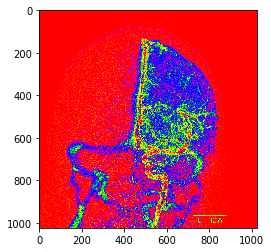

In [15]:
ttp_nn_pred = TTP_model.predict(single_img_Xtest)
ttp_nn_pred = np.reshape(ttp_nn_pred, (1024, 1024))

plt.imshow(ttp_nn_pred, cmap='prism')

In [6]:
single_img_labelT = label_extract("perfAngio_105.mat", "TTP")

In [8]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr_TTP = linear_model.LinearRegression()
regr_TTP.fit(X_trainT_arr, Y_trainT_arr)

# Make predictions using the testing set
Y_predT = regr_TTP.predict(X_testT_arr)


# The mean squared error
print("Mean squared error: %.3f" % mean_squared_error(Y_testT_arr, Y_predT))

# Explained variance score: 1 is perfect prediction
print("Variance score: %.3f" % r2_score(Y_testT_arr, Y_predT))

X train (50500, 40)
Y train (50500,)
X test (15655, 40)
Y test (15655,)
Mean squared error: 0.082
Variance score: 0.168


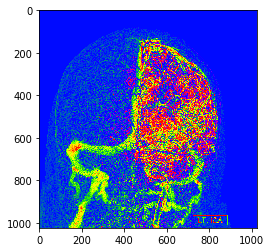

In [9]:
single_img_predT = regr_TTP.predict(single_img_Xtest)
TTP_pred_reg = np.reshape(single_img_predT, (1024, 1024))
plt.imshow(TTP_pred_reg, cmap='prism')

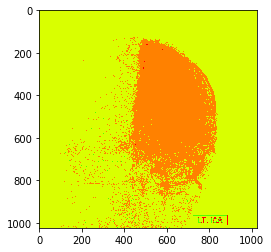

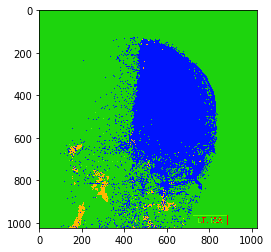

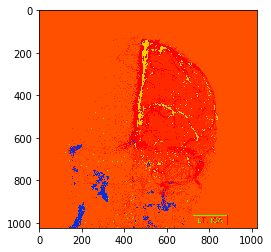

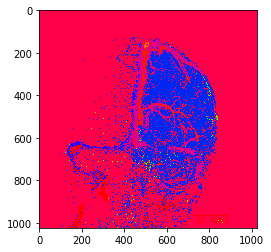

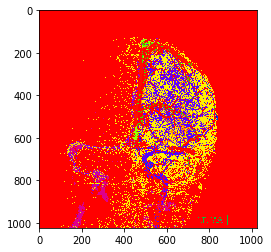

In [10]:
from sklearn.tree import DecisionTreeRegressor

dt_TTP_1 = DecisionTreeRegressor(max_depth=3)
dt_TTP_2 = DecisionTreeRegressor(max_depth=5)
dt_TTP_3 = DecisionTreeRegressor(max_depth=8)
dt_TTP_4 = DecisionTreeRegressor(max_depth=10)
dt_TTP_5 = DecisionTreeRegressor(max_depth=14)

dt_TTP_1.fit(X_train_T, Y_train_T)
dt_TTP_2.fit(X_train_T, Y_train_T)
dt_TTP_3.fit(X_train_T, Y_train_T)
#print(Y_train.shape)
dt_TTP_4.fit(X_train_T, Y_train_T)
dt_TTP_5.fit(X_train_T, Y_train_T)


#single_img_pred = clf2.predict(single_img_Xtest)
dt_img_TTP1 = dt_TTP_1.predict(single_img_Xtest)
dt_img_TTP2 = dt_TTP_2.predict(single_img_Xtest)
dt_img_TTP3 = dt_TTP_3.predict(single_img_Xtest)
dt_img_TTP4 = dt_TTP_4.predict(single_img_Xtest)
dt_img_TTP5 = dt_TTP_5.predict(single_img_Xtest)

#print(single_img_Xtest.shape)
#print(single_img_pred.shape)

plt.figure()
plt.imshow(np.reshape(dt_img_TTP1, (1024, 1024)), cmap='prism')
plt.figure()
plt.imshow(np.reshape(dt_img_TTP2, (1024, 1024)), cmap='prism')
plt.figure()
plt.imshow(np.reshape(dt_img_TTP3, (1024, 1024)), cmap='prism')
plt.figure()
plt.imshow(np.reshape(dt_img_TTP4, (1024, 1024)), cmap='prism')
plt.figure()
plt.imshow(np.reshape(dt_img_TTP5, (1024, 1024)), cmap='prism')

In [ ]:
from sklearn import svm
TTP_svm = svm.SVR(gamma='auto')
TTP_svm.fit(X_trainT_arr, Y_trainT_arr)
single_img_TTP_svm = TTP_svm.predict(single_img_Xtest)

In [16]:
# import from desktop (Tmax)
import os
from scipy import io

trainDir = "/Users/Ebrahim Feghhi/Desktop/Train_files/"
testDir =  "/Users/Ebrahim Feghhi/Desktop/Test_files/"

X_train_max = []
Y_train_max = []
for tr in os.listdir( trainDir ) :
    x_train_i, y_train_i = data_processing(trainDir + tr, 'Tmax')
    
    for i in x_train_i:
        X_train_max.append(i)
        
    for j in y_train_i:
        Y_train_max.append(j)
    
X_test_max = []
Y_test_max = []
for te in os.listdir( testDir ):
    x_test_i, y_test_i = data_processing(testDir + te, 'Tmax')
    
    for i in x_test_i:
        X_test_max.append(i)
        
    for j in y_test_i:
        Y_test_max.append(j)

(303, 40)
X train (303, 40)
Y train (303,)
(404, 40)
X train (404, 40)
Y train (404,)
(303, 40)
X train (303, 40)
Y train (303,)
(303, 40)
X train (303, 40)
Y train (303,)
(404, 40)
X train (404, 40)
Y train (404,)
(404, 40)
X train (404, 40)
Y train (404,)
(404, 40)
X train (404, 40)
Y train (404,)
(369, 40)
X train (369, 40)
Y train (369,)
(303, 40)
X train (303, 40)
Y train (303,)
(307, 40)
X train (307, 40)
Y train (307,)
(269, 40)
X train (269, 40)
Y train (269,)
(303, 40)
X train (303, 40)
Y train (303,)
(303, 40)
X train (303, 40)
Y train (303,)
(405, 40)
X train (405, 40)
Y train (405,)
(404, 40)
X train (404, 40)
Y train (404,)
(505, 40)
X train (505, 40)
Y train (505,)
(505, 40)
X train (505, 40)
Y train (505,)
(505, 40)
X train (505, 40)
Y train (505,)
(505, 40)
X train (505, 40)
Y train (505,)
(309, 40)
X train (309, 40)
Y train (309,)
(404, 40)
X train (404, 40)
Y train (404,)
(303, 40)
X train (303, 40)
Y train (303,)
(303, 40)
X train (303, 40)
Y train (303,)
(404, 40)
X

In [17]:
X_trainmax_arr = np.asarray(X_train_max)
Y_trainmax_arr = np.asarray(Y_train_max)

#print("X train", X_trainC_arr.shape)
#print("Y train", Y_trainC_arr.shape)

X_testmax_arr = np.asarray(X_test_max)
Y_testmax_arr = np.asarray(Y_test_max)

#print("X test", X_testmax_arr.shape)
#print("Y test", Y_testmax_arr.shape)

In [6]:
single_img_labelmax = label_extract("perfAngio_105.mat", "Tmax")

In [18]:
max_model = Sequential()

# units gives the number of nodes in the next hidden layer
max_model.add(Dense(units=20, activation='relu', input_dim = 40))
max_model.add(Dense(units=1, activation='linear'))

max_model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

max_model.fit(X_trainT_arr, Y_trainT_arr, epochs=8, batch_size=500)

loss_and_metrics = max_model.evaluate(X_testT_arr, Y_testT_arr, batch_size=200)

Epoch 1/8
50500/50500 [==============================] - 0s 9us/step - loss: 0.1234 - mean_squared_error: 0.1234 - mean_absolute_error: 0.2894
Epoch 2/8
50500/50500 [==============================] - 0s 4us/step - loss: 0.1040 - mean_squared_error: 0.1040 - mean_absolute_error: 0.2662
Epoch 3/8
50500/50500 [==============================] - 0s 4us/step - loss: 0.0949 - mean_squared_error: 0.0949 - mean_absolute_error: 0.2527
Epoch 4/8
50500/50500 [==============================] - 0s 4us/step - loss: 0.0888 - mean_squared_error: 0.0888 - mean_absolute_error: 0.2431
Epoch 5/8
50500/50500 [==============================] - 0s 4us/step - loss: 0.0855 - mean_squared_error: 0.0855 - mean_absolute_error: 0.2378
Epoch 6/8
50500/50500 [==============================] - 0s 3us/step - loss: 0.0833 - mean_squared_error: 0.0833 - mean_absolute_error: 0.2346
Epoch 7/8
50500/50500 [==============================] - 0s 3us/step - loss: 0.0822 - mean_squared_error: 0.0822 - mean_absolute_error: 0.2329

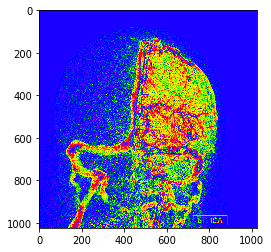

In [19]:
max_nn_pred = max_model.predict(single_img_Xtest)
max_nn_pred = np.reshape(max_nn_pred, (1024, 1024))

plt.imshow(max_nn_pred, cmap='prism')

In [7]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr_max = linear_model.LinearRegression()
regr_max.fit(X_trainmax_arr, Y_trainmax_arr)

# Make predictions using the testing set
Y_predmax = regr_max.predict(X_testmax_arr)


# The mean squared error
print("Mean squared error: %.3f" % mean_squared_error(Y_testmax_arr, Y_predmax))

# Explained variance score: 1 is perfect prediction
print("Variance score: %.3f" % r2_score(Y_testmax_arr, Y_predmax))

Mean squared error: 0.090
Variance score: 0.214


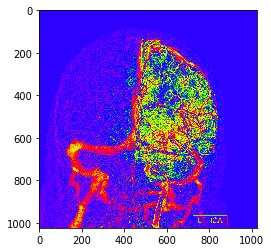

In [8]:
# predicting on whole image using linear regression 
single_img_predmax = regr_max.predict(single_img_Xtest)
max_pred_reg = np.reshape(single_img_predmax, (1024, 1024))
plt.imshow(max_pred_reg, cmap='prism')

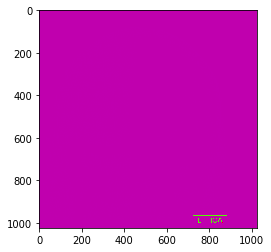

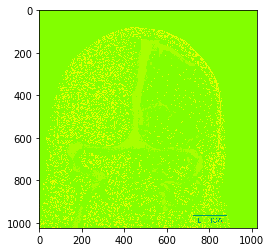

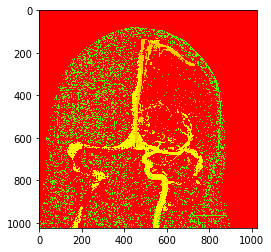

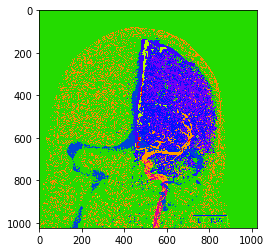

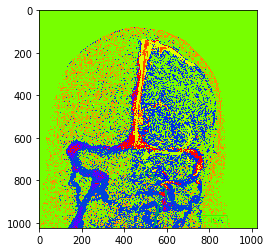

In [9]:
from sklearn.tree import DecisionTreeRegressor

dt_max_1 = DecisionTreeRegressor(max_depth=3)
dt_max_2 = DecisionTreeRegressor(max_depth=5)
dt_max_3 = DecisionTreeRegressor(max_depth=8)
dt_max_4 = DecisionTreeRegressor(max_depth=10)
dt_max_5 = DecisionTreeRegressor(max_depth=14)

dt_max_1.fit(X_train_max, Y_train_max)
dt_max_2.fit(X_train_max, Y_train_max)
dt_max_3.fit(X_train_max, Y_train_max)
#print(Y_train.shape)
dt_max_4.fit(X_train_max, Y_train_max)
dt_max_5.fit(X_train_max, Y_train_max)


#single_img_pred = clf2.predict(single_img_Xtest)
dt_img_max1 = dt_max_1.predict(single_img_Xtest)
dt_img_max2 = dt_max_2.predict(single_img_Xtest)
dt_img_max3 = dt_max_3.predict(single_img_Xtest)
dt_img_max4 = dt_max_4.predict(single_img_Xtest)
dt_img_max5 = dt_max_5.predict(single_img_Xtest)

#print(single_img_Xtest.shape)
#print(single_img_pred.shape)

plt.figure()
plt.imshow(np.reshape(dt_img_max1, (1024, 1024)), cmap='prism')
plt.figure()
plt.imshow(np.reshape(dt_img_max2, (1024, 1024)), cmap='prism')
plt.figure()
plt.imshow(np.reshape(dt_img_max3, (1024, 1024)), cmap='prism')
plt.figure()
plt.imshow(np.reshape(dt_img_max4, (1024, 1024)), cmap='prism')
plt.figure()
plt.imshow(np.reshape(dt_img_max5, (1024, 1024)), cmap='prism')

In [10]:
from sklearn import svm
max_svm = svm.SVR(gamma='auto')
max_svm.fit(X_trainmax_arr, Y_trainmax_arr)
single_img_max_svm = max_svm.predict(single_img_Xtest)

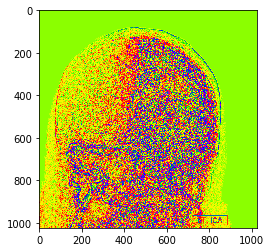

In [11]:
plt.figure()
plt.imshow(np.reshape(single_img_max_svm, (1024, 1024)), cmap='prism')